In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt

# minimize: x^2 + y^2 + z^4  
#-100 < x,y,z <100

w = 1
w_damp = 0.995
c1 = 1.5
c2 = 1.5

lower_bound = np.array([0, 0, 0, 0])
upper_bound = np.array([100, 100, 100, 100])

vel_max = 0.1 * (upper_bound-lower_bound)

class Particle:
    def __init__(self):
        self.dvar = np.random.random(4)*200 -100
        self.velocity = np.random.random(4)*200 -100
        self.personal_best = None
        self.fitness = None
        
    def calc_fitness(self):
        self.fitness = fit(self.dvar)

In [2]:
def fit(x):
    z = x[0]*2 - 4*x[1] + 5*x[2] - 6*x[3]
    lhs1 = x[0] + 4*x[1] - 2*x[2] + 8*x[3]
    lhs2 = -x[0] + 2*x[1] + 3*x[2] + 4*x[3]
    rhs1 = 2
    rhs2 = 1
    d1 = lhs1-rhs1
    d2 = lhs2-rhs2
    if d1 > 0:
        z = z - 100*d1
    if d2 > 0:
        z = z - 100*d2
    # z = x[0]**2 + x[1]**2 + x[2]**2 + x[3]**2
    return z

In [3]:
p1 = Particle()
p1.calc_fitness()
print(p1.dvar)
print(p1.fitness)

[ 30.21281881  60.87240623 -95.94491321 -66.59344394]
-263.2278896791735


In [4]:
pop_size = 200
population = []
best_fit = math.inf
global_best = Particle()

for i in range(pop_size):
    population.append(Particle())
    population[i].calc_fitness()
    population[i].personal_best = Particle()
    population[i].personal_best.calc_fitness()
    if (population[i].fitness < best_fit):
        best_fit = population[i].fitness
        global_best = population[i]

print(best_fit)
print(global_best.dvar)

-161857.53372291845
[-27.89782647  78.43159002  53.38239902  90.92680745]


In [5]:
best = []
for it in range(500):
    # update position
    for i in range(pop_size):
        # population[i].dvar += population[i].velocity
        #update velocity
        population[i].velocity = w*population[i].velocity + c1*np.random.rand(4)*(population[i].personal_best.dvar - population[i].dvar) + c2*np.random.rand(4)*(global_best.dvar-population[i].dvar)
        #update velocity bound
        population[i].velocity = np.maximum(population[i].velocity, -vel_max)
        population[i].velocity = np.minimum(population[i].velocity, vel_max)
        #update dvar
        population[i].dvar += population[i].velocity
        # update dvar bound
        population[i].dvar = np.maximum(population[i].dvar, lower_bound)
        population[i].dvar = np.minimum(population[i].dvar, upper_bound)      
        # calc_fitness
        population[i].calc_fitness()  
        #update personal best
        if population[i].fitness > population[i].personal_best.fitness:
            population[i].personal_best = population[i]
        # update global best
        if population[i].fitness > global_best.fitness:
            global_best = population[i]
        #damp w
        w = w * w_damp
    print(global_best.dvar, " - ", global_best.fitness)
    best.append(global_best.fitness)


[0. 0. 0. 0.]  -  0.0
[0. 0. 0. 0.]  -  0.0
[0. 0. 0. 0.]  -  0.0
[0.0472866 0.        0.2274407 0.       ]  -  1.231776715945514
[2.35762495 0.         0.36862675 0.        ]  -  6.558383661921187
[2.63722332 0.         1.07442858 0.01550836]  -  10.55353937431845
[4.05615031 0.01101073 1.43155937 0.02893421]  -  15.052449305673948
[5.32642657e+00 0.00000000e+00 2.11182859e+00 2.05134369e-03]  -  19.473230483786754
[6.14197727e+00 3.04141982e-04 2.27874253e+00 5.86028037e-03]  -  23.641288958932684
[6.94508475e+00 8.93445193e-05 2.58715310e+00 5.57458663e-03]  -  26.79213008821689
[7.25190203e+00 5.46808119e-05 2.70497546e+00 6.67405611e-03]  -  27.98841829725191
[7.44036334e+00 4.24517503e-05 2.75718463e+00 6.51971764e-03]  -  28.627361713487673
[7.66177469e+00 4.84304195e-05 2.86354203e+00 2.55243701e-03]  -  29.625751174415733
[7.89828576e+00 5.14149448e-05 2.95849618e+00 7.82864118e-04]  -  30.58414958881615
[7.94402132e+00 8.84962793e-05 2.97885106e+00 1.35502221e-03]  -  30.7738

(0.0, 50.0)

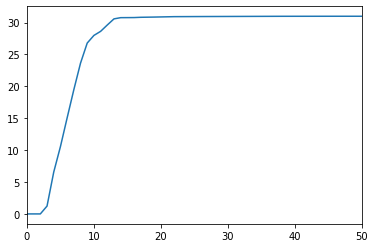

In [8]:
plt.plot(best)
plt.xlim((0, 50))

In [7]:
a = np.arange(0,5)
b = np.arange(3,8)

np.maximum(a,b)

array([3, 4, 5, 6, 7])